In [14]:
import torch
from dpm.models import GaussianNaiveBayes
from dpm.visualize import plot_stats

In [15]:
y = torch.cat((torch.zeros(1000), torch.ones(2000))).view(-1, 1)
y.shape

torch.Size([3000, 1])

In [27]:
x = torch.cat((1 + 2.*torch.randn(1000, 10), -1 + 2.*torch.randn(2000, 10)), dim=0)
x.shape

torch.Size([3000, 10])

In [28]:
model = GaussianNaiveBayes()

In [29]:
model.log_prob(x, y)

tensor([-32.7073, -57.4105, -38.5455,  ..., -38.7187, -47.9426, -30.4980],
       grad_fn=<SumBackward2>)

In [30]:
stats = model.fit(x, y)

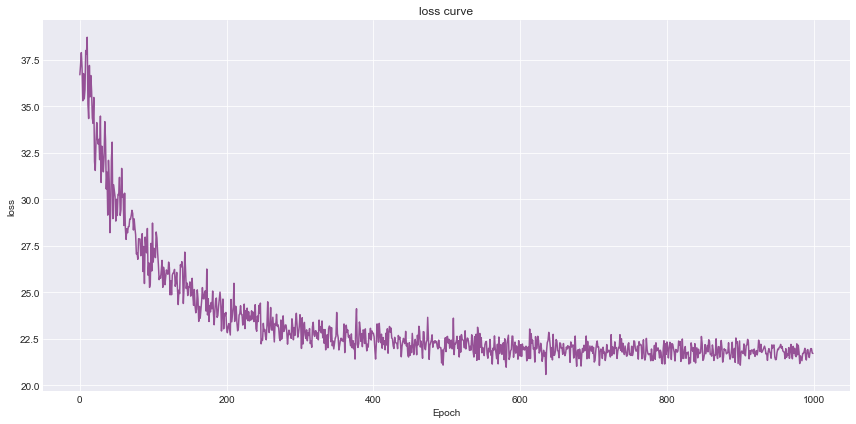

In [31]:
plot_stats(stats)

In [32]:
model.y_dist.probs

tensor([0.3307, 0.6693], grad_fn=<SoftmaxBackward>)

In [33]:
(model.predict(x) == y.long()).float().mean()

tensor(0.9527)

In [34]:
model.x_dist[0].loc

Parameter containing:
tensor([0.8960, 1.0133, 0.9628, 0.9712, 1.0196, 1.0903, 1.0222, 1.0516, 0.9670,
        0.9346], requires_grad=True)

In [35]:
model.x_dist[1].loc

Parameter containing:
tensor([-0.9460, -0.9662, -1.0110, -1.0202, -0.9962, -0.9798, -0.9827, -0.9940,
        -1.0085, -1.0610], requires_grad=True)

In [36]:
X = model.sample(5)
print(X)

tensor([[ 1.8773,  0.9698,  4.9989,  2.4300,  2.9400,  0.7291,  6.2336,  1.0159,
          0.6246,  1.8679],
        [-1.1303, -3.4885, -1.5279, -6.2634, -0.8028,  0.7989, -0.6008,  2.0427,
         -1.6249,  1.1252],
        [-2.1561, -3.4439,  0.1088, -2.7380, -2.3503, -5.3094,  1.0639,  0.5275,
          1.6834, -0.2533],
        [ 0.1142, -0.4803, -0.8578,  1.1171,  0.2965,  0.9242, -1.7052,  0.4072,
          0.2852, -0.2090],
        [ 0.3082, -1.4023, -1.4307,  2.3708, -1.2228,  2.1448, -2.1390, -1.5747,
         -2.0584, -0.6736]], grad_fn=<IndexBackward>)


In [37]:
model.predict(X)

tensor([[0],
        [1],
        [1],
        [1],
        [1]])